# Data Preprocessing Tools

## Importing the libraries

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Importing the dataset

In [41]:
df = pd.read_csv("C:\\Users\\Patrick Meyer\\Desktop\\Fordham MSDS\\Fall 22'\\Mathematics for DS\\Math Project\\WHRcontinent.csv")


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1957 entries, 0 to 1956
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country name                       1957 non-null   object 
 1   year                               1957 non-null   int64  
 2   Life Ladder                        1957 non-null   float64
 3   Log GDP per capita                 1931 non-null   float64
 4   Social support                     1944 non-null   float64
 5   Healthy life expectancy at birth   1899 non-null   float64
 6   Freedom to make life choices       1933 non-null   float64
 7   Generosity                         1888 non-null   float64
 8   Perceptions of corruption          1872 non-null   float64
 9   Positive affect                    1938 non-null   float64
 10  Negative affect                    1945 non-null   float64
 11  Confidence in national government  1771 non-null   float

In [42]:
df = df.rename(columns = {'Country name ' : 'country', 'year' : 'year', 'Life Ladder' : 'Life_Ladder', 'Log GDP per capita' : 'GDP', 'Social support' : 'Social_support', 'Healthy life expectancy at birth' : 'Healthy_life_expectancy_at_birth', 'Freedom to make life choices' : 'Freedom_to_make_life_choices', 'Perceptions of corruption' : 'Perceptions_of_corruption',
                          'Positive affect' : 'Positive_affect', ' Negative affect' : 'Negative_affect', 'Confidence in national government' : 'Confidence_in_national_government'})

In [43]:
df.head()


,Country name,year,Life_Ladder,GDP,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative affect,Confidence_in_national_government,Continent
0,Afghanistan,2007,3.753590,7.312574,0.450662,46.500000,0.708114,0.173169,0.881686,0.414297,0.258195,0.612072,Asia
1,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.163169,0.891686,0.454297,0.258195,0.612072,Asia
2,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545,Asia
3,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357,Asia
4,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386,Asia


In [44]:
print(len(df.index))

1957


In [45]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)  
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  
    missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])  
    return missing_data

missing_check(df)

,Total,Percent
Confidence_in_national_government,186,9.504343
Perceptions_of_corruption,85,4.343383
Generosity,69,3.525805
Healthy_life_expectancy_at_birth,58,2.963720
Continent,39,1.992846
GDP,26,1.328564
Freedom_to_make_life_choices,24,1.226367
Positive_affect,19,0.970874
Social_support,13,0.664282
Negative affect,12,0.613183


In [91]:
idx = (df["year"] != 2005) & (df["year"] != 2006) & (df["year"] != 2007) & (df["year"] != 2008) & (df["year"] != 2009) & (df["year"] != 2010) 
df_idx = df[idx]

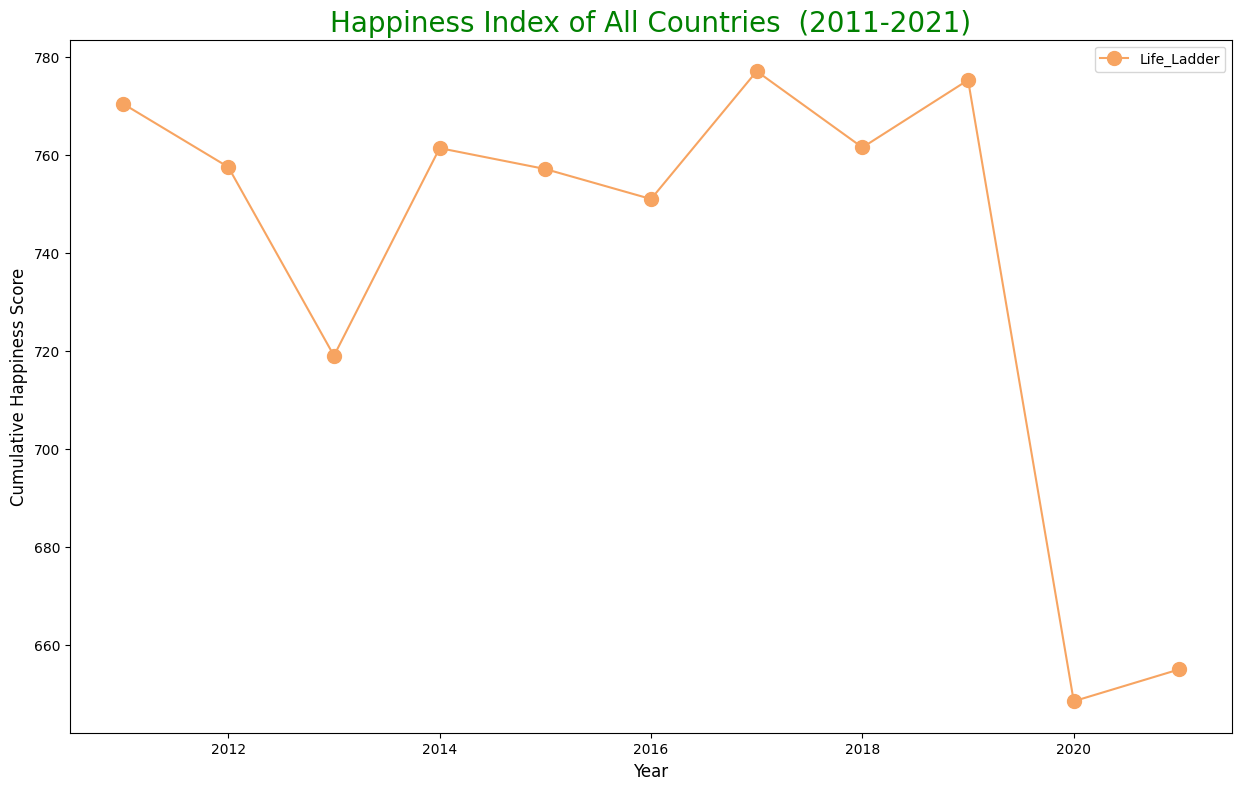

In [93]:
df_idx[['year','Life_Ladder']].groupby(['year']).sum().plot(figsize=(15,9), color='#f7a461', marker='o', markersize=10)
idx = (df["year"] != 2020) & (df["year"] != 2021)
plt.title('Happiness Index of All Countries  (2011-2021)', color='g', fontsize=20, ha='center')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Cumulative Happiness Score', fontsize = 12)

plt.show()

##Cumulative of All Countries 
##Label Y Axis 

## Taking care of missing data

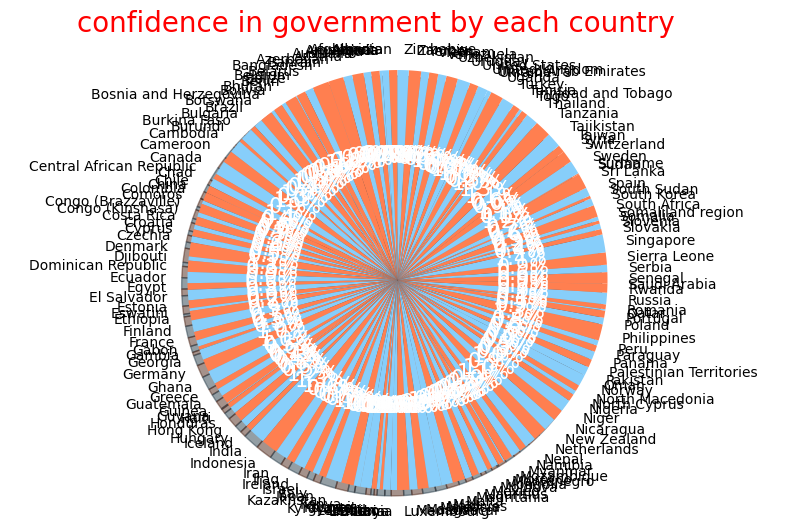

In [47]:
##Select handful of countries? 

df_piechart = df.groupby(by=['Country name']).agg({"Confidence_in_national_government": ['sum']})
df_piechart.columns = ['Confidence_in_national_government']
df_piechart.reset_index(inplace=True)


fig1, ax1 = plt.subplots(figsize=(10,6))
myexplode = [0.2, 0]
wedges, texts, autotexts = ax1.pie(df_piechart['Confidence_in_national_government'], labels=df_piechart['Country name'], autopct='%1.1f%%', startangle=90, colors= ['#FF7F50', '#87CEFA'], shadow = True)
ax1.axis('equal')

plt.setp(autotexts, size=15, color="w")
plt.figtext(.5,.91,'confidence in government by each country  ', color='r', fontsize=20, ha='center')
plt.show()

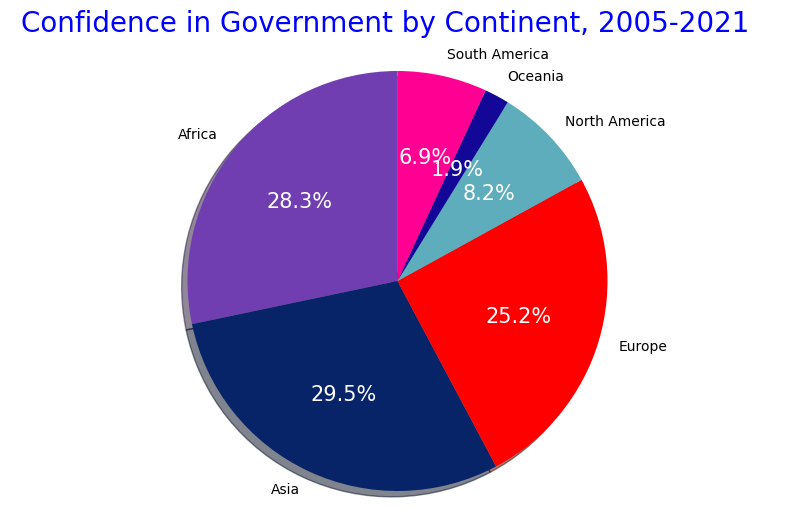

In [48]:
##PIE CHART
## AVERAGES IF WANT ACCURATE PIE CHART

df_piechart = df.groupby(by=['Continent']).agg({"Confidence_in_national_government": ['sum']})
df_piechart.columns = ['Confidence_in_national_government']
df_piechart.reset_index(inplace=True)


fig1, ax1 = plt.subplots(figsize=(10,6))
myexplode = [0.2, 0]
wedges, texts, autotexts = ax1.pie(df_piechart['Confidence_in_national_government'], labels=df_piechart['Continent'], autopct='%1.1f%%', startangle=90, colors= ['#703eb0', '#082468','#ff0000','#5dadbd','#130798','#ff0092'], shadow = True)
ax1.axis('equal')
plt.setp(autotexts, size=15, color="w")
plt.figtext(.5,.91,'Confidence in Government by Continent, 2005-2021', color='b', fontsize=20, ha='center')
plt.show()

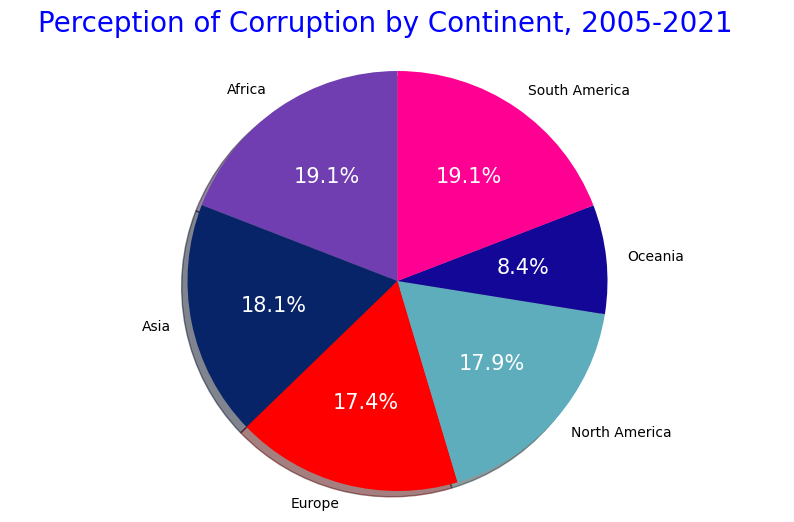

In [98]:
##PIE CHART
## AVERAGES IF WANT ACCURATE PIE CHART

df_piechart = df.groupby(by=['Continent']).agg({"Perceptions_of_corruption": ['mean']})
df_piechart.columns = ['Perceptions_of_corruption']
df_piechart.reset_index(inplace=True)


fig1, ax1 = plt.subplots(figsize=(10,6))
myexplode = [0.2, 0]
wedges, texts, autotexts = ax1.pie(df_piechart['Perceptions_of_corruption'], labels=df_piechart['Continent'], autopct='%1.1f%%', startangle=90, colors= ['#703eb0', '#082468','#ff0000','#5dadbd','#130798','#ff0092'], shadow = True)
ax1.axis('equal')
plt.setp(autotexts, size=15, color="w")
plt.figtext(.5,.91,'Perception of Corruption by Continent, 2005-2021', color='b', fontsize=20, ha='center')
plt.show()

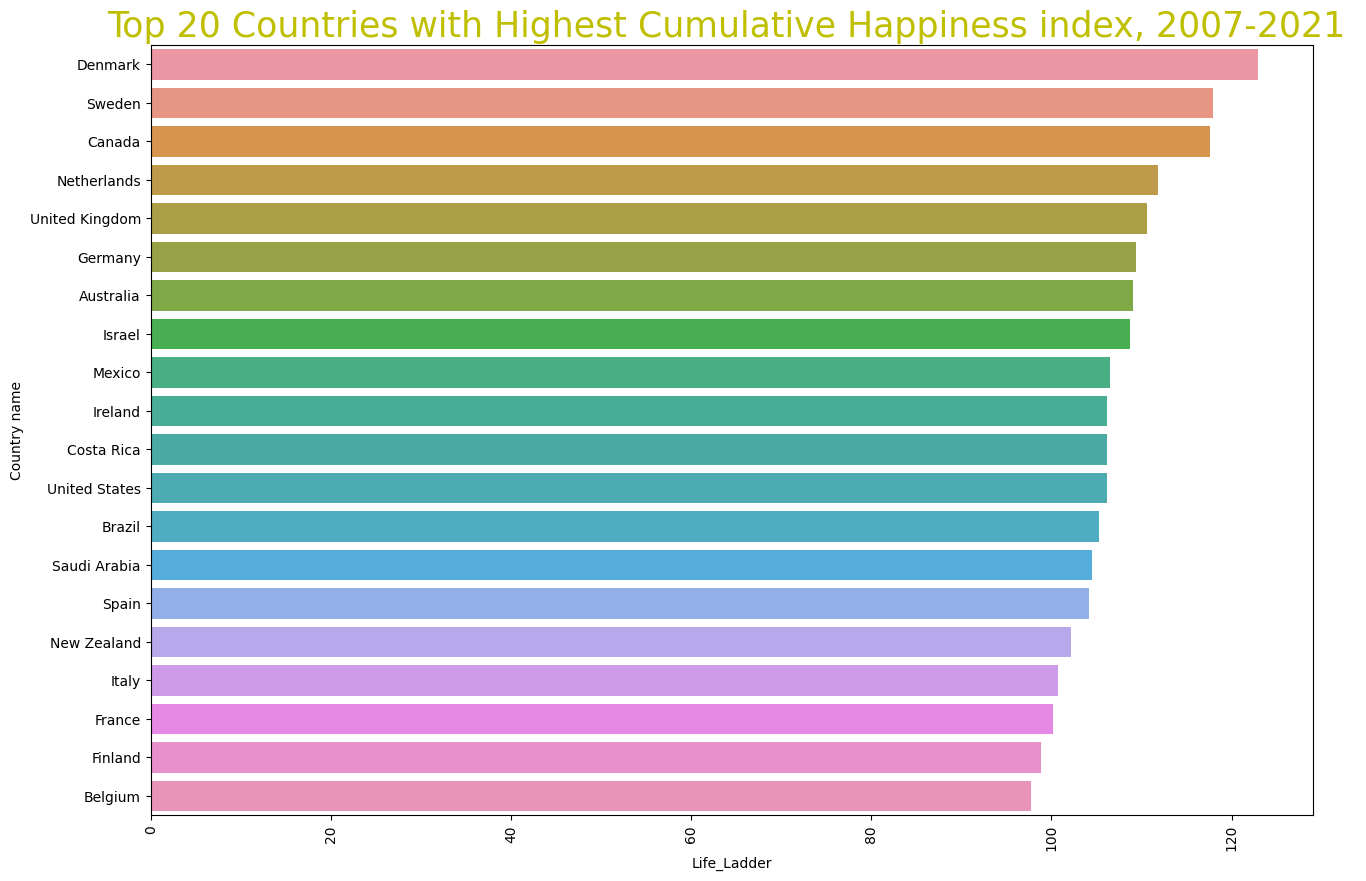

In [50]:
df_top20 = df.groupby(by=['Country name']).agg({'Life_Ladder': ['sum']})
df_top20.columns = ['Life_Ladder']
df_top20.reset_index(inplace = True)
df_top20 = df_top20.sort_values(by = ['Life_Ladder'], ascending = False).head(20)

#Plotting top 20 Countries
plt.figure(figsize=(15,10))
sns.barplot(data = df_top20, x = 'Life_Ladder', y = 'Country name')
plt.xticks(rotation=90)
plt.title('Top 20 Countries with Highest Cumulative Happiness index, 2007-2021 ', color='y', fontsize=25, ha='center')
plt.show()

## Change Axis Labels, remove underscore

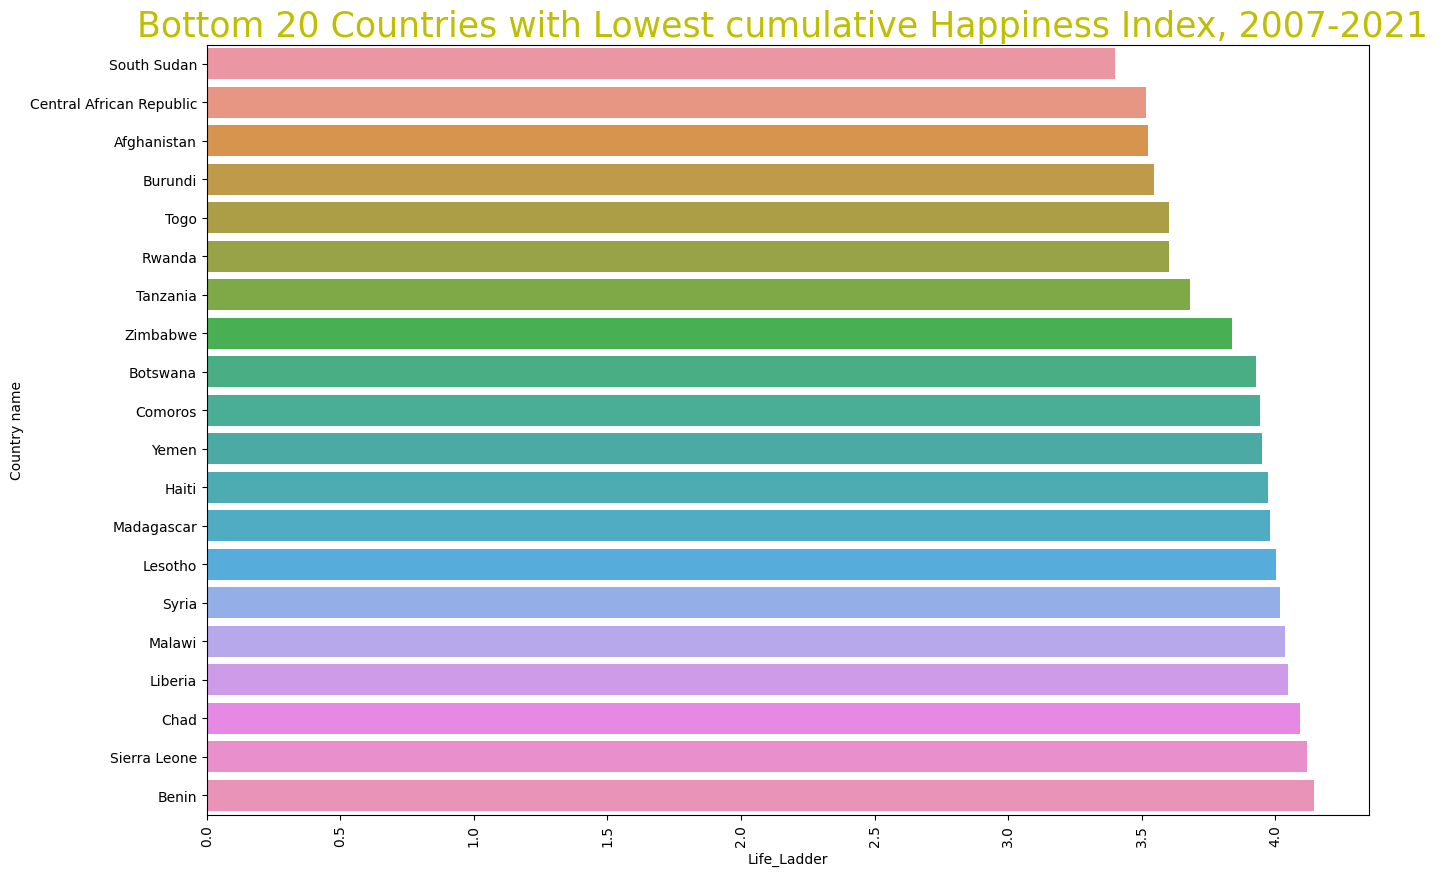

In [99]:
df_top20 = df.groupby(by=['Country name']).agg({'Life_Ladder': ['mean']})
df_top20.columns = ['Life_Ladder']
df_top20.reset_index(inplace = True)
df_top20 = df_top20.sort_values(by = ['Life_Ladder'], ascending = True).head(20)

#Plotting top 20 Countries
plt.figure(figsize=(15,10))
sns.barplot(data = df_top20, x = 'Life_Ladder', y = 'Country name')
plt.xticks(rotation=90)
plt.title('Bottom 20 Countries with Lowest cumulative Happiness Index, 2007-2021 ', color='y', fontsize=25, ha='center')
plt.show()

## Changes same as above 
## Axis labels

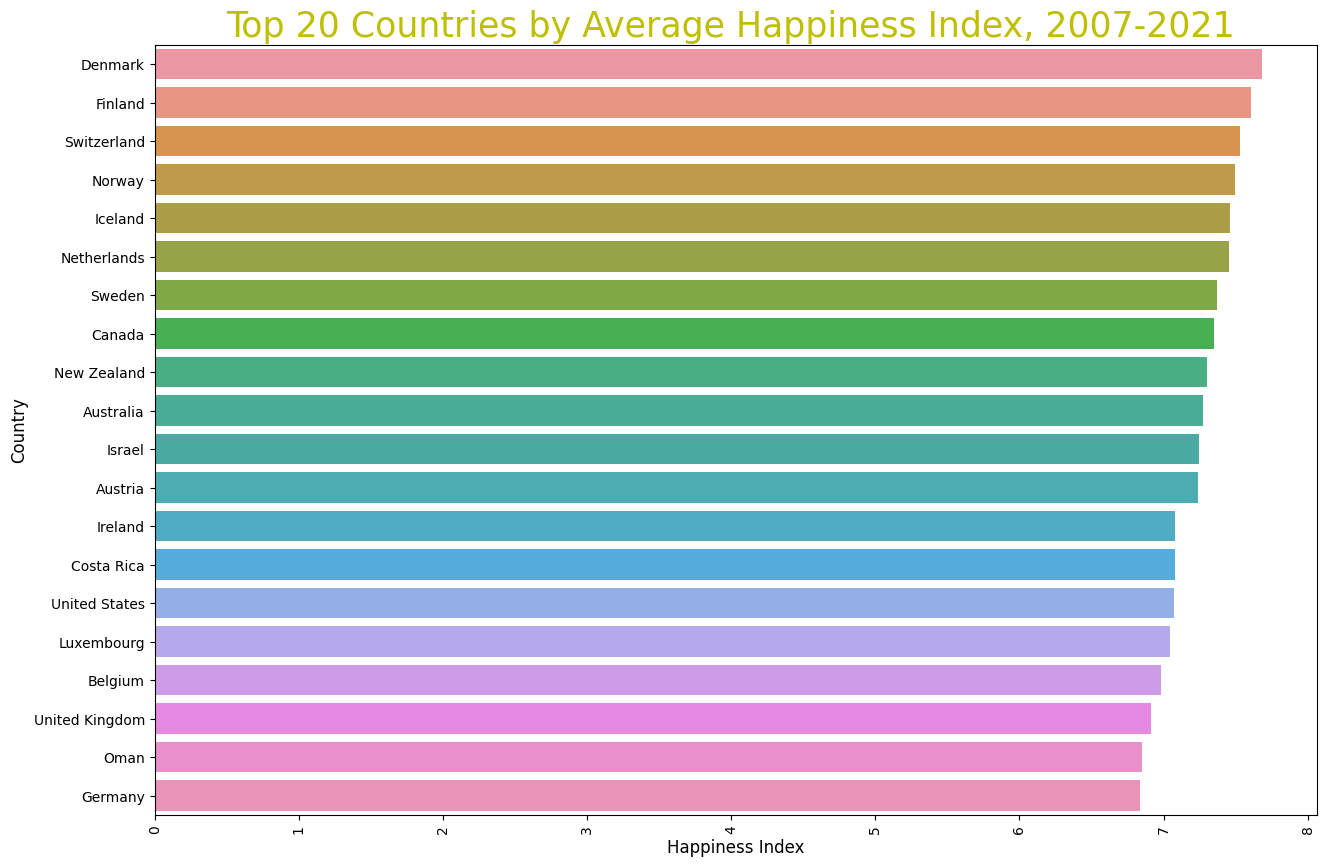

In [94]:
df_top20 = df.groupby(by=['Country name']).agg({'Life_Ladder': ['mean']})
df_top20.columns = ['Life_Ladder']
df_top20.reset_index(inplace = True)
df_top20 = df_top20.sort_values(by = ['Life_Ladder'], ascending = False).head(20)

#Plotting top 20 Countries
plt.figure(figsize=(15,10))
sns.barplot(data = df_top20, x = 'Life_Ladder', y = 'Country name')
plt.xticks(rotation=90)
plt.title('Top 20 Countries by Average Happiness Index, 2007-2021 ', color='y', fontsize=25, ha='center')
plt.xlabel('Happiness Index', fontsize = 12)
plt.ylabel('Country', fontsize = 12)
plt.show()

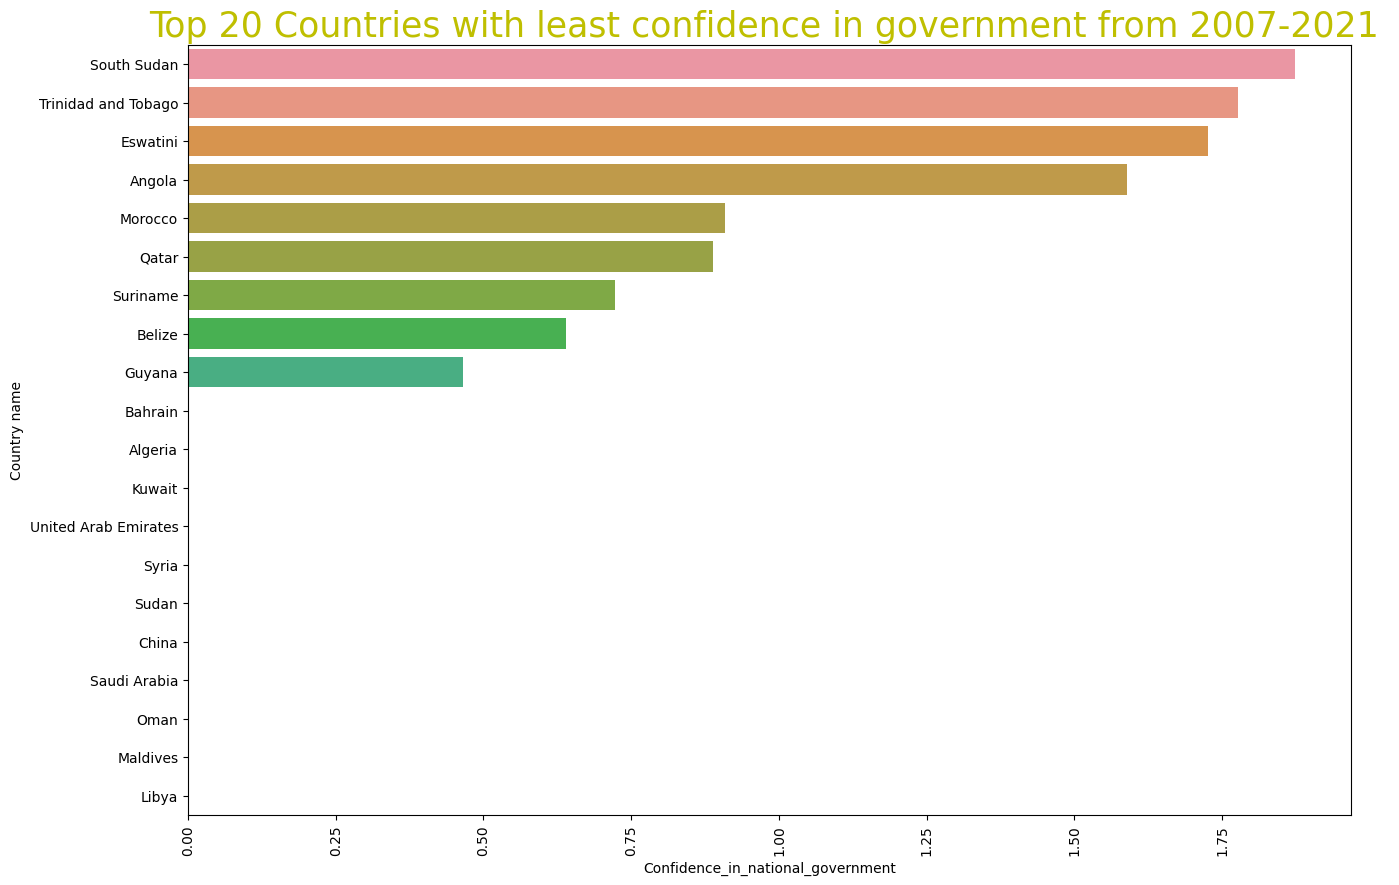

In [53]:
df_top20 = df.groupby(by=['Country name']).agg({'Confidence_in_national_government': ['sum']})
df_top20.columns = ['Confidence_in_national_government']
df_top20.reset_index(inplace = True)
df_top20 = df_top20.sort_values(by = ['Confidence_in_national_government'], ascending = False).tail(20)

#Plotting top 20 Countries
plt.figure(figsize=(15,10))
sns.barplot(data = df_top20, x = 'Confidence_in_national_government', y = 'Country name')
plt.xticks(rotation=90)
plt.title('Top 20 Countries with least confidence in government from 2007-2021 ', color='y', fontsize=25, ha='center')
plt.show()


In [54]:
df_denmark = df[df['Country name'] == 'Denmark']
df_denmark.head()

df_EUR = df[df['Continent'] == 'Europe']
df_EUR.tail()

,Country name,year,Life_Ladder,GDP,Social_support,Healthy_life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative affect,Confidence_in_national_government,Continent
1834,United Kingdom,2017,7.103273,10.744459,0.937495,69.900002,0.812733,0.288102,0.418611,0.712405,0.209572,0.440121,Europe
1835,United Kingdom,2018,7.233445,10.754775,0.928484,70.000000,0.837508,0.222922,0.404276,0.736233,0.228276,0.420860,Europe
1836,United Kingdom,2019,7.157151,10.765715,0.942681,70.099998,0.854040,0.267003,0.485092,0.738786,0.251014,0.340829,Europe
1837,United Kingdom,2020,6.798177,10.658096,0.929353,70.199997,0.884624,0.197766,0.490204,0.717481,0.224655,0.346973,Europe
1838,United Kingdom,2021,6.866962,10.719703,0.854030,70.300003,0.815077,0.254903,0.447527,0.683882,0.265626,0.394754,Europe


In [55]:
#Creating a dataframe for ploting line plots

df_lgdp = pd.DataFrame(df_denmark[['year','GDP']].groupby(['year']).sum().reset_index())
df_ll = df_denmark[['year','Life_Ladder']].groupby(['year']).mean()
df_ss = pd.DataFrame(df_denmark[['year','Social_support']].groupby(['year']).sum().reset_index())
df_poc = pd.DataFrame(df_denmark[['year','Perceptions_of_corruption']].groupby(['year']).sum().reset_index())
df_cng = pd.DataFrame(df_denmark[['year','Confidence_in_national_government']].groupby(['year']).sum().reset_index())
df_hleb = pd.DataFrame(df_denmark[['year','Healthy_life_expectancy_at_birth']].groupby(['year']).sum().reset_index())
df_genro = pd.DataFrame(df_denmark[['year','Generosity']].groupby(['year']).sum().reset_index())
df_pe = pd.DataFrame(df_denmark[['year','Positive_affect']].groupby(['year']).sum().reset_index())
df_ne = pd.DataFrame(df_denmark[['year','Negative affect']].groupby(['year']).sum().reset_index())
df_fmlc = pd.DataFrame(df_denmark[['year','Freedom_to_make_life_choices']].groupby(['year']).sum().reset_index())
df_cont = pd.DataFrame(df_denmark[['year','Continent']].groupby(['year']).sum().reset_index())





In [56]:
df_sel1 = pd.merge(df_lgdp, df_ll,on = 'year')
df_sel2 = pd.merge(df_ss, df_poc,on = 'year')
df_sel3 = pd.merge(df_cng, df_hleb,on = 'year')
df_sel4 = pd.merge(df_genro, df_pe,on = 'year')
df_sel5 = pd.merge(df_ne, df_fmlc,on = 'year')


In [57]:
df11 = pd.merge(df_sel1, df_sel2,on = 'year')
df12 = pd.merge(df11, df_sel3,on = 'year')
df13 = pd.merge(df12, df_sel4,on = 'year')
df14 = pd.merge(df13, df_cont, on = 'year')


df_final = pd.merge(df14, df_sel5,on = 'year')
df_final.head(20)

,year,GDP,Life_Ladder,Social_support,Perceptions_of_corruption,Confidence_in_national_government,Healthy_life_expectancy_at_birth,Generosity,Positive_affect,Continent,Negative affect,Freedom_to_make_life_choices
0,2005,10.849012,8.018934,0.972372,0.236522,0.668683,68.300003,0.000000,0.776689,Europe,0.153672,0.971135
1,2007,10.888726,7.834233,0.954201,0.206006,0.592506,68.739998,0.237539,0.777936,Europe,0.194324,0.932086
2,2008,10.877718,7.970892,0.953912,0.247505,0.665934,68.959999,0.269613,0.759462,Europe,0.163091,0.969788
3,2009,10.822057,7.683359,0.938892,0.205770,0.626578,69.180000,0.261129,0.781799,Europe,0.233585,0.949336
4,2010,10.836152,7.770515,0.974977,0.174896,0.586689,69.400002,0.240007,0.796209,Europe,0.154563,0.943631
5,2011,10.845314,7.788232,0.961736,0.220043,0.471823,69.620003,0.295087,0.777892,Europe,0.174883,0.934760
6,2012,10.843813,7.519909,0.951437,0.187408,0.534253,69.839996,0.136319,0.782716,Europe,0.208570,0.932628
7,2013,10.848934,7.588607,0.964708,0.170042,0.391405,70.059998,0.212346,0.825601,Europe,0.194674,0.920255
8,2014,10.859928,7.507559,0.956344,0.237218,0.457837,70.279999,0.115580,0.779868,Europe,0.232613,0.941572
9,2015,10.876019,7.514425,0.959701,0.191016,0.579889,70.500000,0.219611,0.801433,Europe,0.217578,0.941436


## Time Series Plots

In [58]:
from sklearn.preprocessing import MinMaxScaler

happ_index = df_ll['Life_Ladder']
happ_index = happ_index.values.reshape(-1,1)
scaler = MinMaxScaler()
happ_index = scaler.fit_transform(happ_index)
happ_index = pd.DataFrame(df_ll['Life_Ladder']).reset_index()

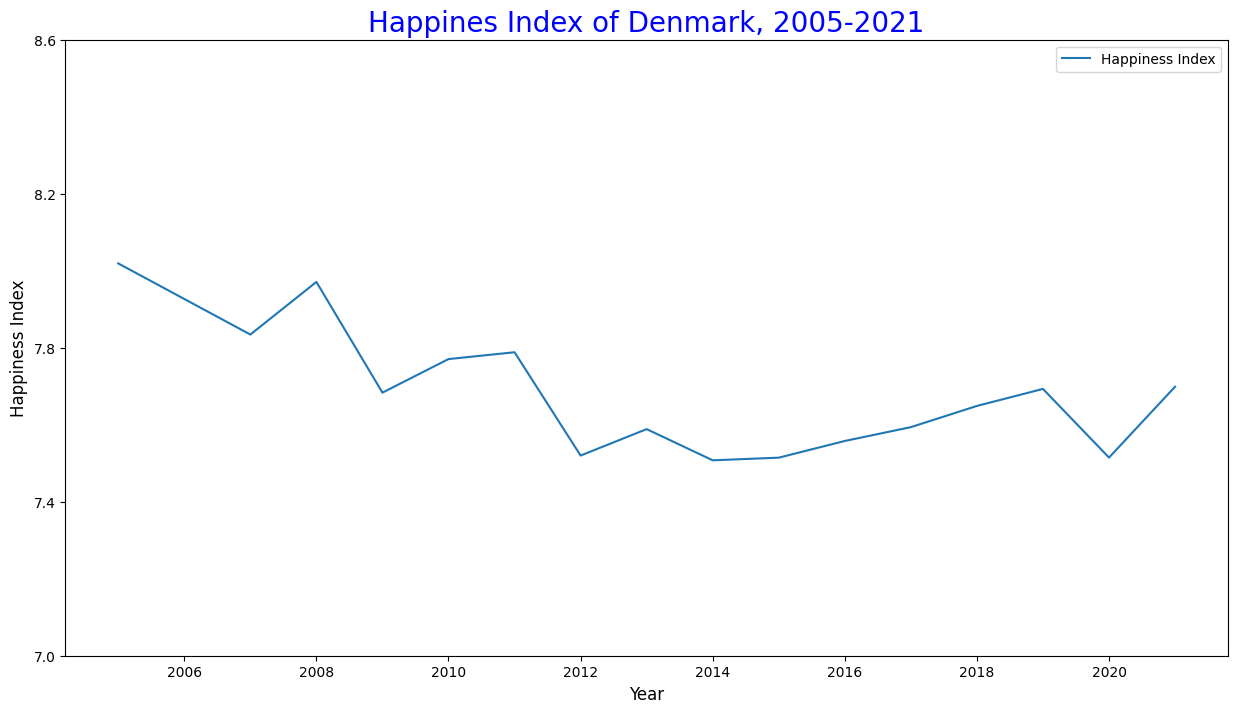

In [97]:
#Plotting Happiness of Denmark 
plt.figure(figsize = (15,8))
sns.lineplot(data = happ_index, x = 'year', y = 'Life_Ladder')

plt.yticks(np.arange(7,9,0.4))
plt.title("Happines Index of Denmark, 2005-2021", color='b', fontsize=20, ha='center')
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Happiness Index', fontsize = 12)
plt.legend(labels=['Happiness Index'])
plt.show()

##Change Labels 

In [60]:
#Plotting Denmark
plt.figure(figsize = (10,6))
#sns.lineplot(gdp.year,gdp.Life_Ladder)
sns.lineplot(df_hleb.year,df_hleb.Healthy_life_expectancy_at_birth)
plt.yticks(np.arange(65,71,1))
plt.title("Healthy life expectancy at birth for Denmark ", color='r', fontsize=20, ha='center')
plt.legend(labels=['GDP Per Capita', 'covid cases'])
plt.show()

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1000x600 with 0 Axes>

## Cumulative Plots

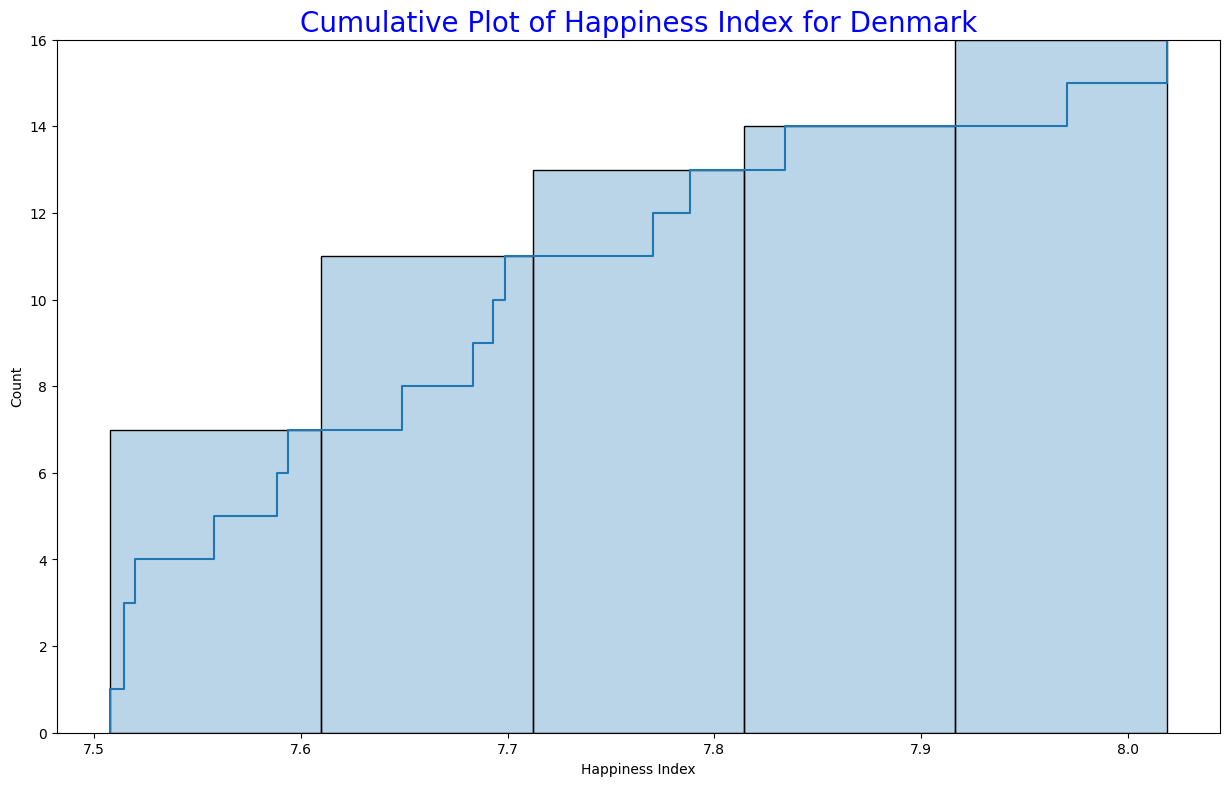

In [151]:

fig = plt.subplots(figsize=(15,9))
stat = "count"
sns.histplot(x='Life_Ladder', data=df_final, stat=stat, cumulative=True, alpha=.3)
sns.ecdfplot(x='Life_Ladder', data=df_final, stat=stat)
plt.title("Cumulative Plot of Happiness Index for Denmark", color='b', fontsize=20, ha='center')
plt.xlabel('Happiness Index')
plt.show()

## Axis label 
## Questionable Graph?? Need to figure out 

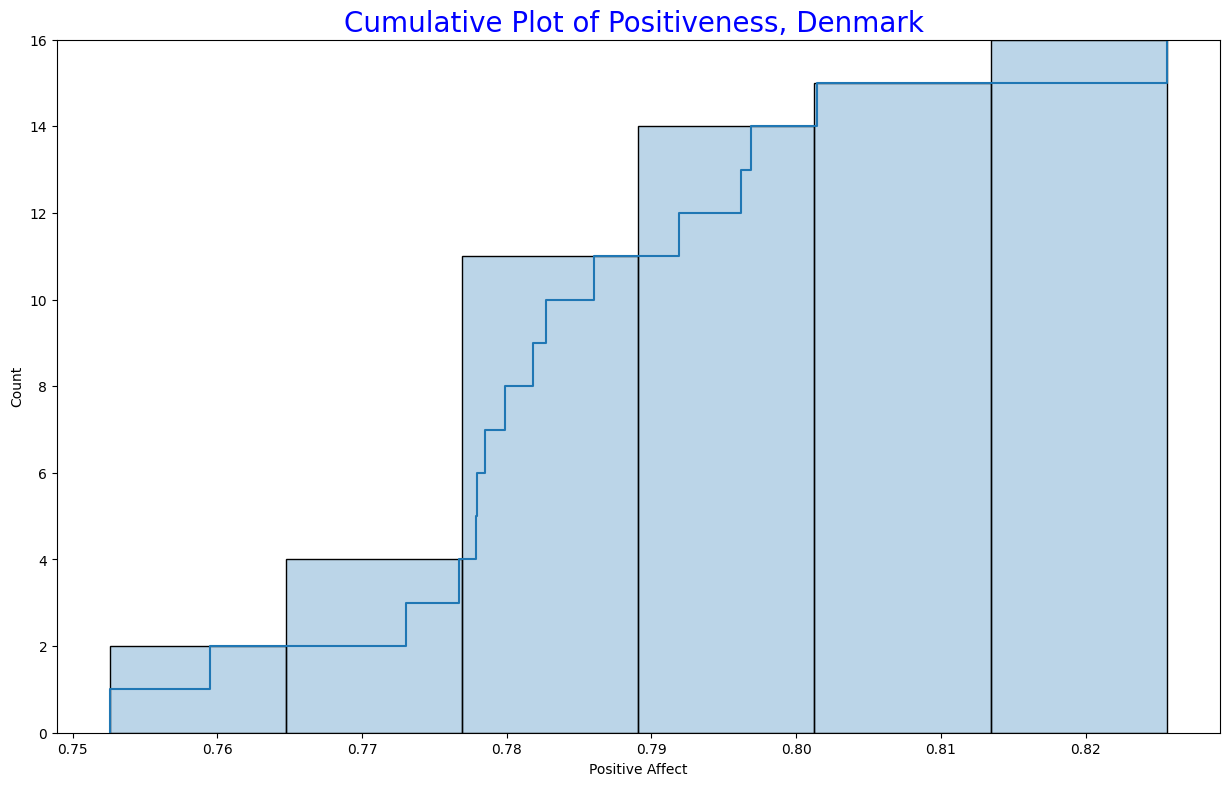

In [154]:
# Cumulative plot for Positivity - Denmark 

fig = plt.subplots(figsize=(15,9))
stat = "count"
sns.histplot(x='Positive_affect', data=df_final, stat=stat, cumulative=True, alpha=.3)
sns.ecdfplot(x='Positive_affect', data=df_final, stat=stat)
plt.title("Cumulative Plot of Positiveness, Denmark ", color='b', fontsize=20, ha='center')
plt.xlabel('Positive Affect')
plt.show()

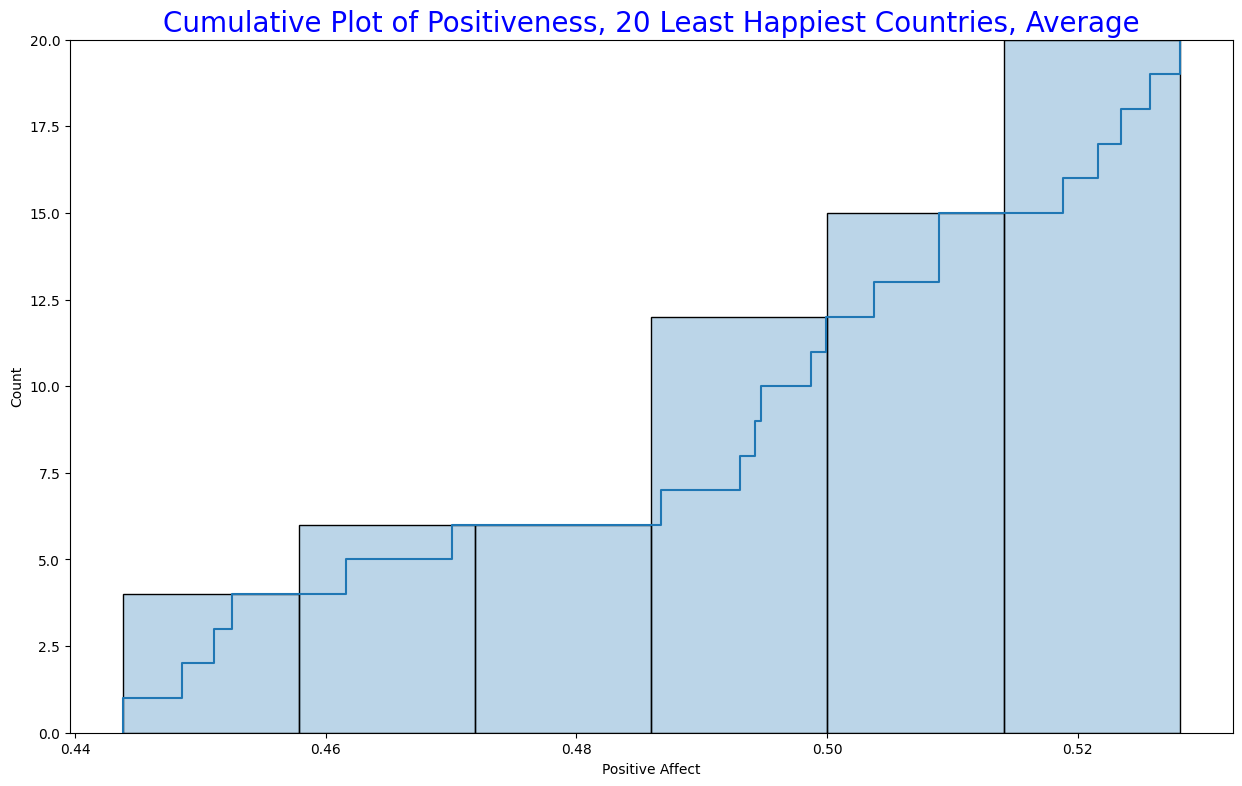

In [179]:
df_top20 = df.groupby(by=['Country name']).agg({'Positive_affect': ['mean']})
df_top20.columns = ['Positive_affect']
df_top20.reset_index(inplace = True)
df_top20 = df_top20.sort_values(by = ['Positive_affect'], ascending = True).head(20) 

fig = plt.subplots(figsize=(15,9))
stat = "count"
sns.histplot(x='Positive_affect', data=df_top20, stat=stat, cumulative=True, alpha=.3)
sns.ecdfplot(x='Positive_affect', data=df_top20, stat=stat)
plt.title("Cumulative Plot of Positiveness, 20 Least Happiest Countries, Average", color='b', fontsize=20, ha='center')
plt.xlabel('Positive Affect')
plt.show()

In [172]:

df_final.head(16)


,GDP,Life_Ladder,Social_support,Perceptions_of_corruption,Confidence_in_national_government,Healthy_life_expectancy_at_birth,Generosity,Positive_affect,Continent,Negative affect,Freedom_to_make_life_choices,COVID_RATE,gdp_change
0,10.849012,8.018934,0.972372,0.236522,0.668683,68.300003,0.000000,0.776689,Europe,0.153672,0.971135,0.399947,NaN
1,10.888726,7.834233,0.954201,0.206006,0.592506,68.739998,0.237539,0.777936,Europe,0.194324,0.932086,0.390345,3.971386
2,10.877718,7.970892,0.953912,0.247505,0.665934,68.959999,0.269613,0.759462,Europe,0.163091,0.969788,0.396957,-1.100826
3,10.822057,7.683359,0.938892,0.205770,0.626578,69.180000,0.261129,0.781799,Europe,0.233585,0.949336,0.382447,-5.566120
4,10.836152,7.770515,0.974977,0.174896,0.586689,69.400002,0.240007,0.796209,Europe,0.154563,0.943631,0.386593,1.409531
5,10.845314,7.788232,0.961736,0.220043,0.471823,69.620003,0.295087,0.777892,Europe,0.174883,0.934760,0.387282,0.916195
6,10.843813,7.519909,0.951437,0.187408,0.534253,69.839996,0.136319,0.782716,Europe,0.208570,0.932628,0.373753,-0.150109
7,10.848934,7.588607,0.964708,0.170042,0.391405,70.059998,0.212346,0.825601,Europe,0.194674,0.920255,0.376980,0.512123
8,10.859928,7.507559,0.956344,0.237218,0.457837,70.279999,0.115580,0.779868,Europe,0.232613,0.941572,0.372769,1.099396
9,10.876019,7.514425,0.959701,0.191016,0.579889,70.500000,0.219611,0.801433,Europe,0.217578,0.941436,0.372924,1.609135


    year        GDP  Life_Ladder  Social_support  Perceptions_of_corruption  \
0   2005  10.849012     8.018934        0.972372                   0.236522   
1   2007  10.888726     7.834233        0.954201                   0.206006   
2   2008  10.877718     7.970892        0.953912                   0.247505   
3   2009  10.822057     7.683359        0.938892                   0.205770   
4   2010  10.836152     7.770515        0.974977                   0.174896   
5   2011  10.845314     7.788232        0.961736                   0.220043   
6   2012  10.843813     7.519909        0.951437                   0.187408   
7   2013  10.848934     7.588607        0.964708                   0.170042   
8   2014  10.859928     7.507559        0.956344                   0.237218   
9   2015  10.876019     7.514425        0.959701                   0.191016   
10  2016  10.900160     7.557783        0.954452                   0.209893   
11  2017  10.921553     7.593702        0.952100    

In [142]:
df_final['gdp_change'] = (df_final['GDP'] - df_final['GDP'].shift(1)) * 100


Text(0, 0.5, 'Rate of Change of GDP')

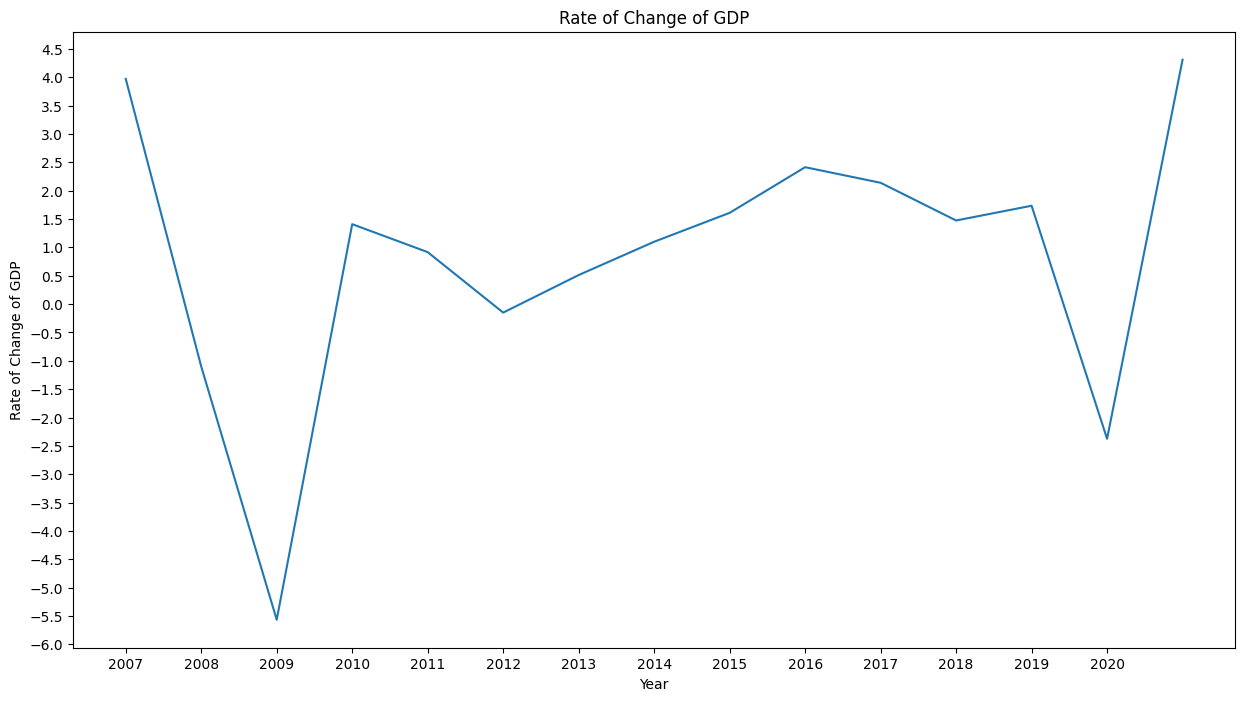

In [149]:
plt.figure(figsize = (15,8))
plt.yticks(np.arange(-6,5,0.5))
plt.xticks(np.arange(2007,2021,1))
sns.lineplot(x='year', y='gdp_change', data=df_final)
plt.title('Rate of Change of GDP')
plt.xlabel('Year')
plt.ylabel('Rate of Change of GDP')

# 

## Scatter Plot for total cases V/s Other Features

ValueError: Could not interpret value `Year` for parameter `x`

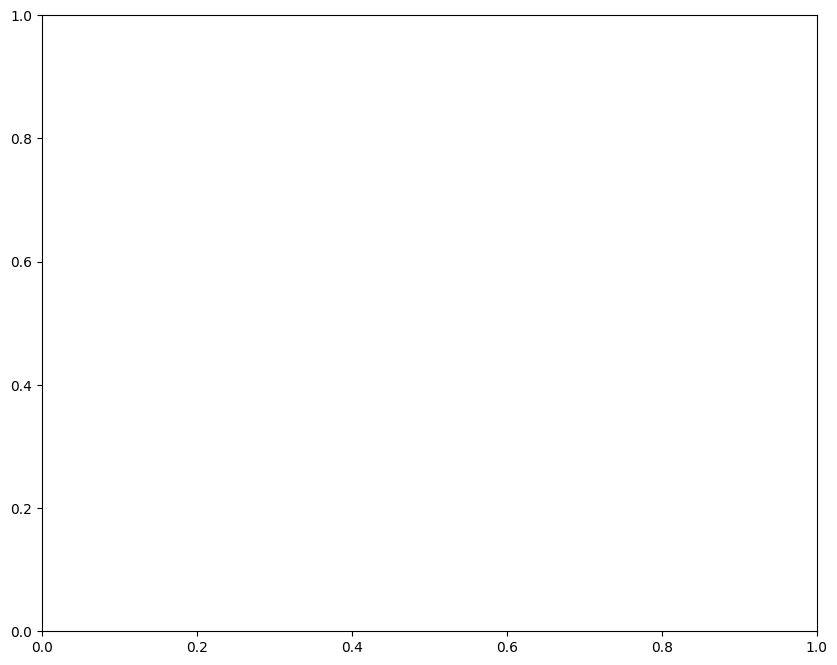

In [213]:
# Scatter Plot for GDP V/s Suicide Numbers
f, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.scatterplot(x="year", y="GDP", data=df, color='b')
plt.title('Scatter Plot for Top 20 GDPs, 2005-2021', color='b', fontsize=15, ha='center')
plt.show()

ValueError: Could not interpret value `Year` for parameter `x`

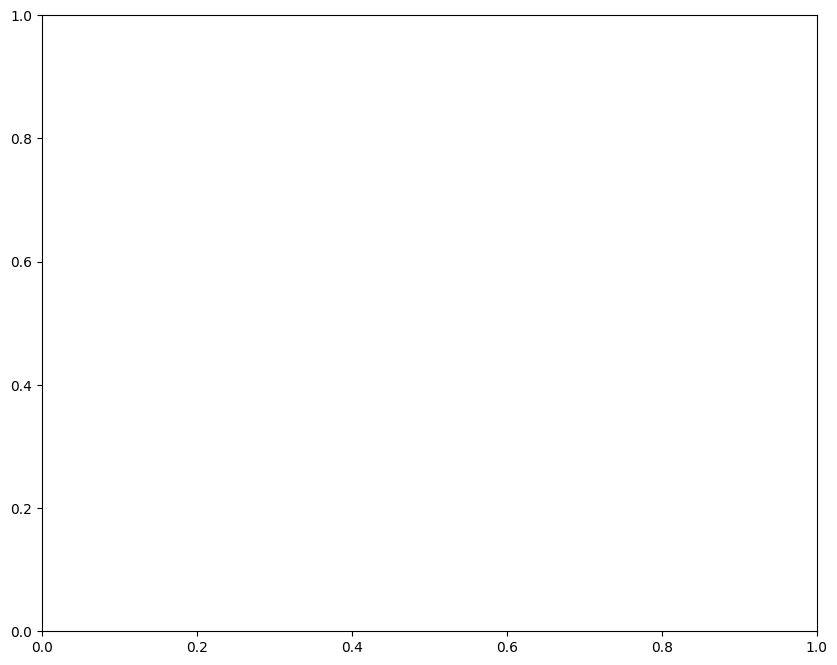

In [215]:
# Scatter Plot for GDP V/s Suicide Numbers
f, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.scatterplot(x="Year", y="Life_Ladder", data=df, color='b')
plt.title('Scatter Plot for Top 20 Happiness Score, 2005-2021', color='b', fontsize=15, ha='center')
plt.show()

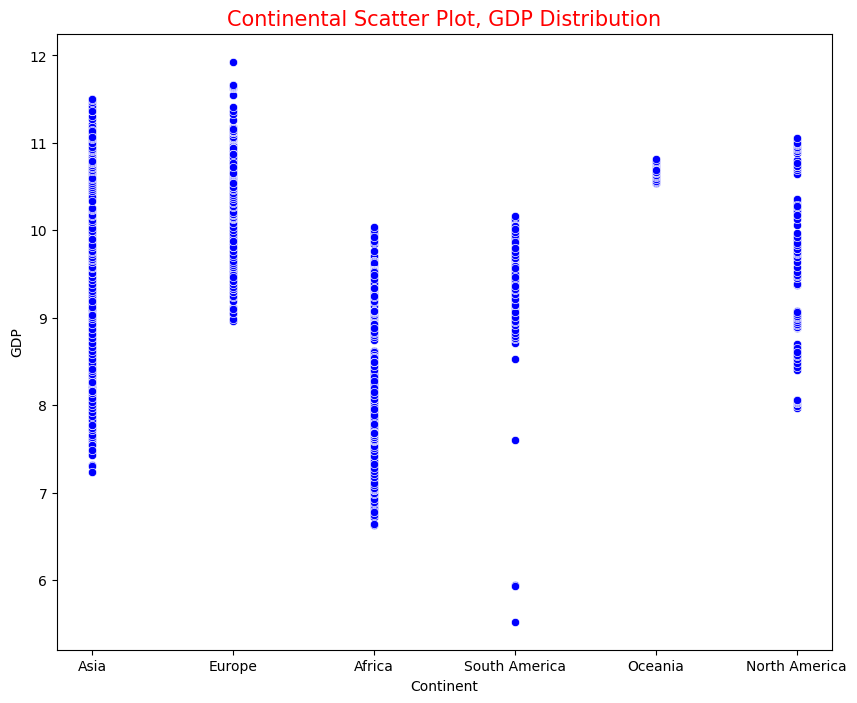

In [159]:
# Scatter Plot for GDP V/s Suicide Numbers
f, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.scatterplot(x="Continent", y="GDP", data=df, color='blue')
plt.title('Continental Scatter Plot, GDP Distribution', color='r', fontsize=15, ha='center')
plt.show()

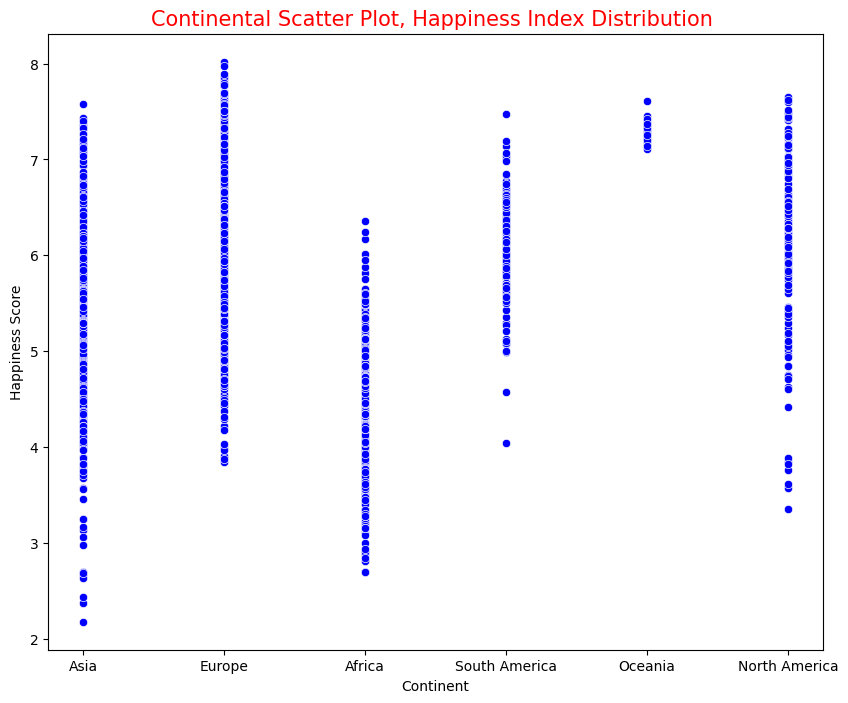

In [158]:
f, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.scatterplot(x="Continent", y="Life_Ladder", data=df, color='blue')
plt.title('Continental Scatter Plot, Happiness Index Distribution ', color='r', fontsize=15, ha='center')
plt.ylabel('Happiness Score')
plt.show()

In [68]:
## Heatmap of Correlations

In [223]:
df.drop('year', axis = 1, inplace = True)
corr = df.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='pink',xticklabels='auto', yticklabels='auto')
plt.title('Heatmap of Correlations for Global Happiness', color='r', fontsize = 20, ha='center')
plt.xticks(rotation=45);
plt.show()

KeyError: "['year'] not found in axis"

C:\Users\Patrick Meyer\AppData\Local\Temp\ipykernel_26708\1533052406.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_final.corr()


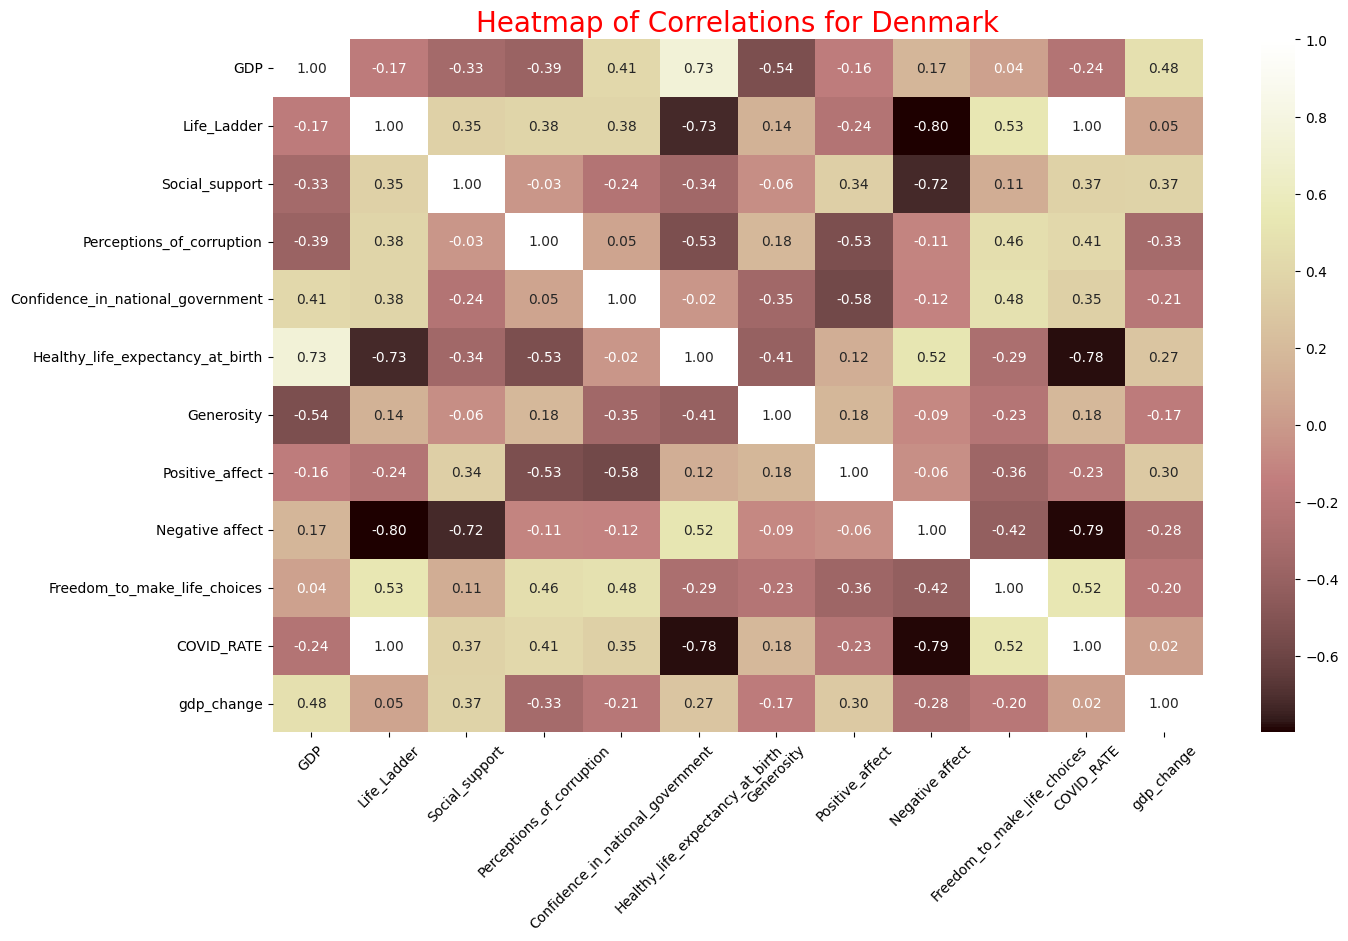

In [218]:

corr = df_final.corr()
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='pink',xticklabels='auto', yticklabels='auto')
plt.title('Heatmap of Correlations for Denmark', color='r', fontsize = 20, ha='center')
plt.xticks(rotation=45);
plt.show()

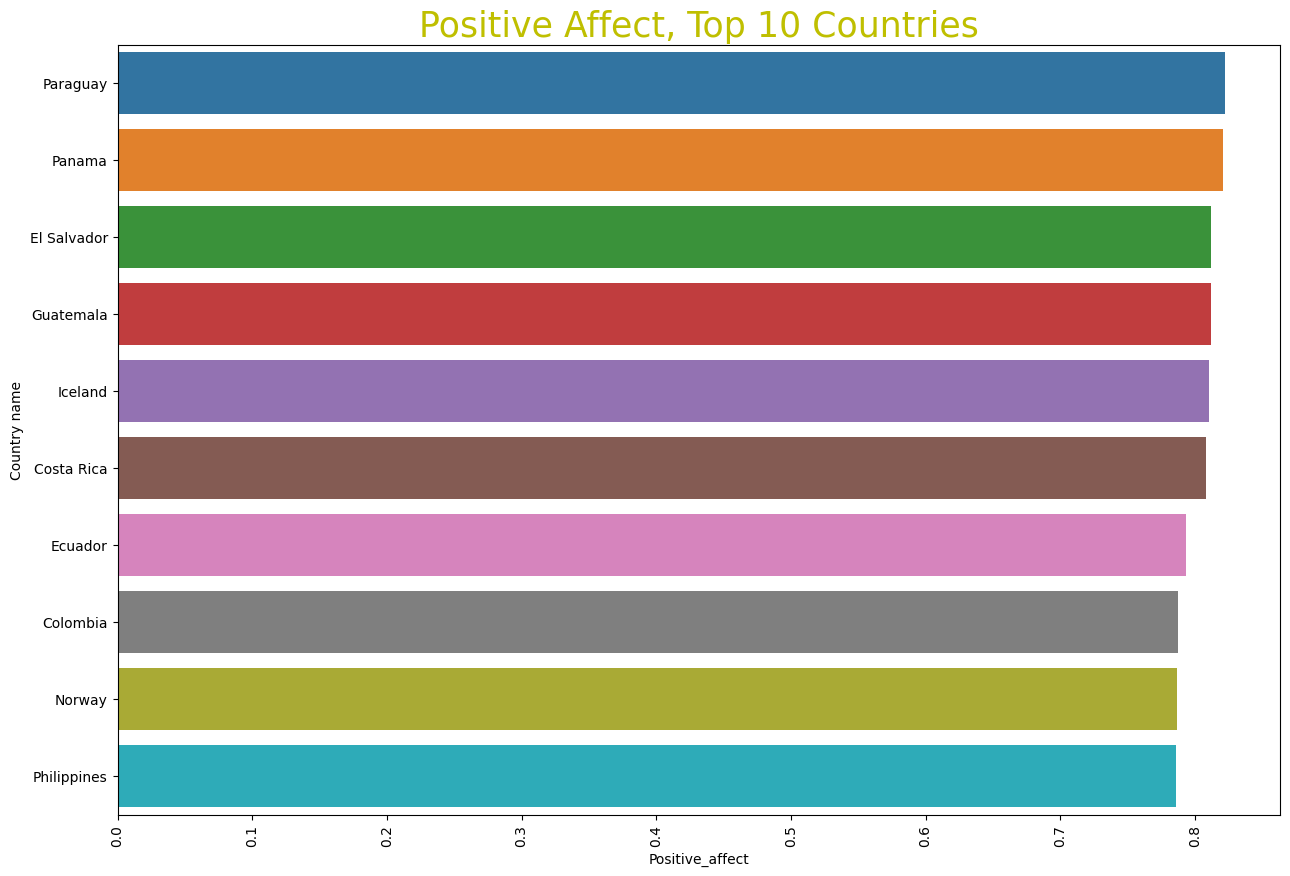

In [188]:
df_country_top20 = df.groupby(by=['Country name']).agg({'Positive_affect': ['mean']})
df_country_top20.columns = ['Positive_affect']
df_country_top20.reset_index(inplace = True)
df_country_top20 = df_country_top20.sort_values(by = ['Positive_affect'], ascending = False).head(10)

#Plotting top 20 Countries
plt.figure(figsize=(15,10))
sns.barplot(data = df_country_top20, x = 'Positive_affect', y = 'Country name')
plt.xticks(rotation=90)
plt.title('Positive Affect, Top 10 Countries', color='y', fontsize=25, ha='center')
plt.show()

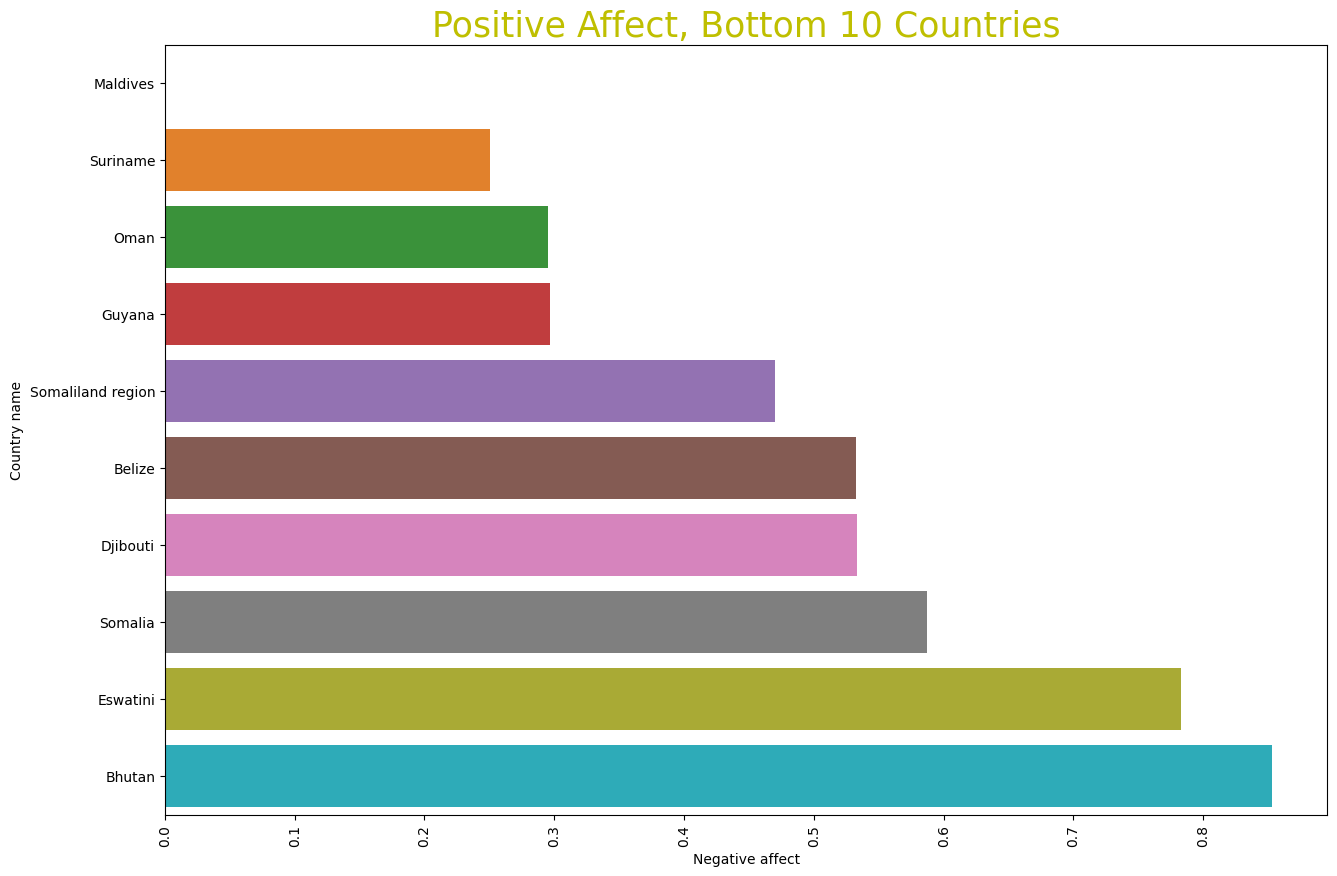

In [175]:
df_country_top20 = df.groupby(by=['Country name']).agg({'Negative affect': ['sum']})
df_country_top20.columns = ['Negative affect']
df_country_top20.reset_index(inplace = True)
df_country_top20 = df_country_top20.sort_values(by = ['Negative affect'], ascending = True).head(10)

#Plotting top 20 Countries
plt.figure(figsize=(15,10))
sns.barplot(data = df_country_top20, x = 'Negative affect', y = 'Country name')
plt.xticks(rotation=90)
plt.title('Positive Affect, Bottom 10 Countries', color='y', fontsize=25, ha='center')
plt.show()

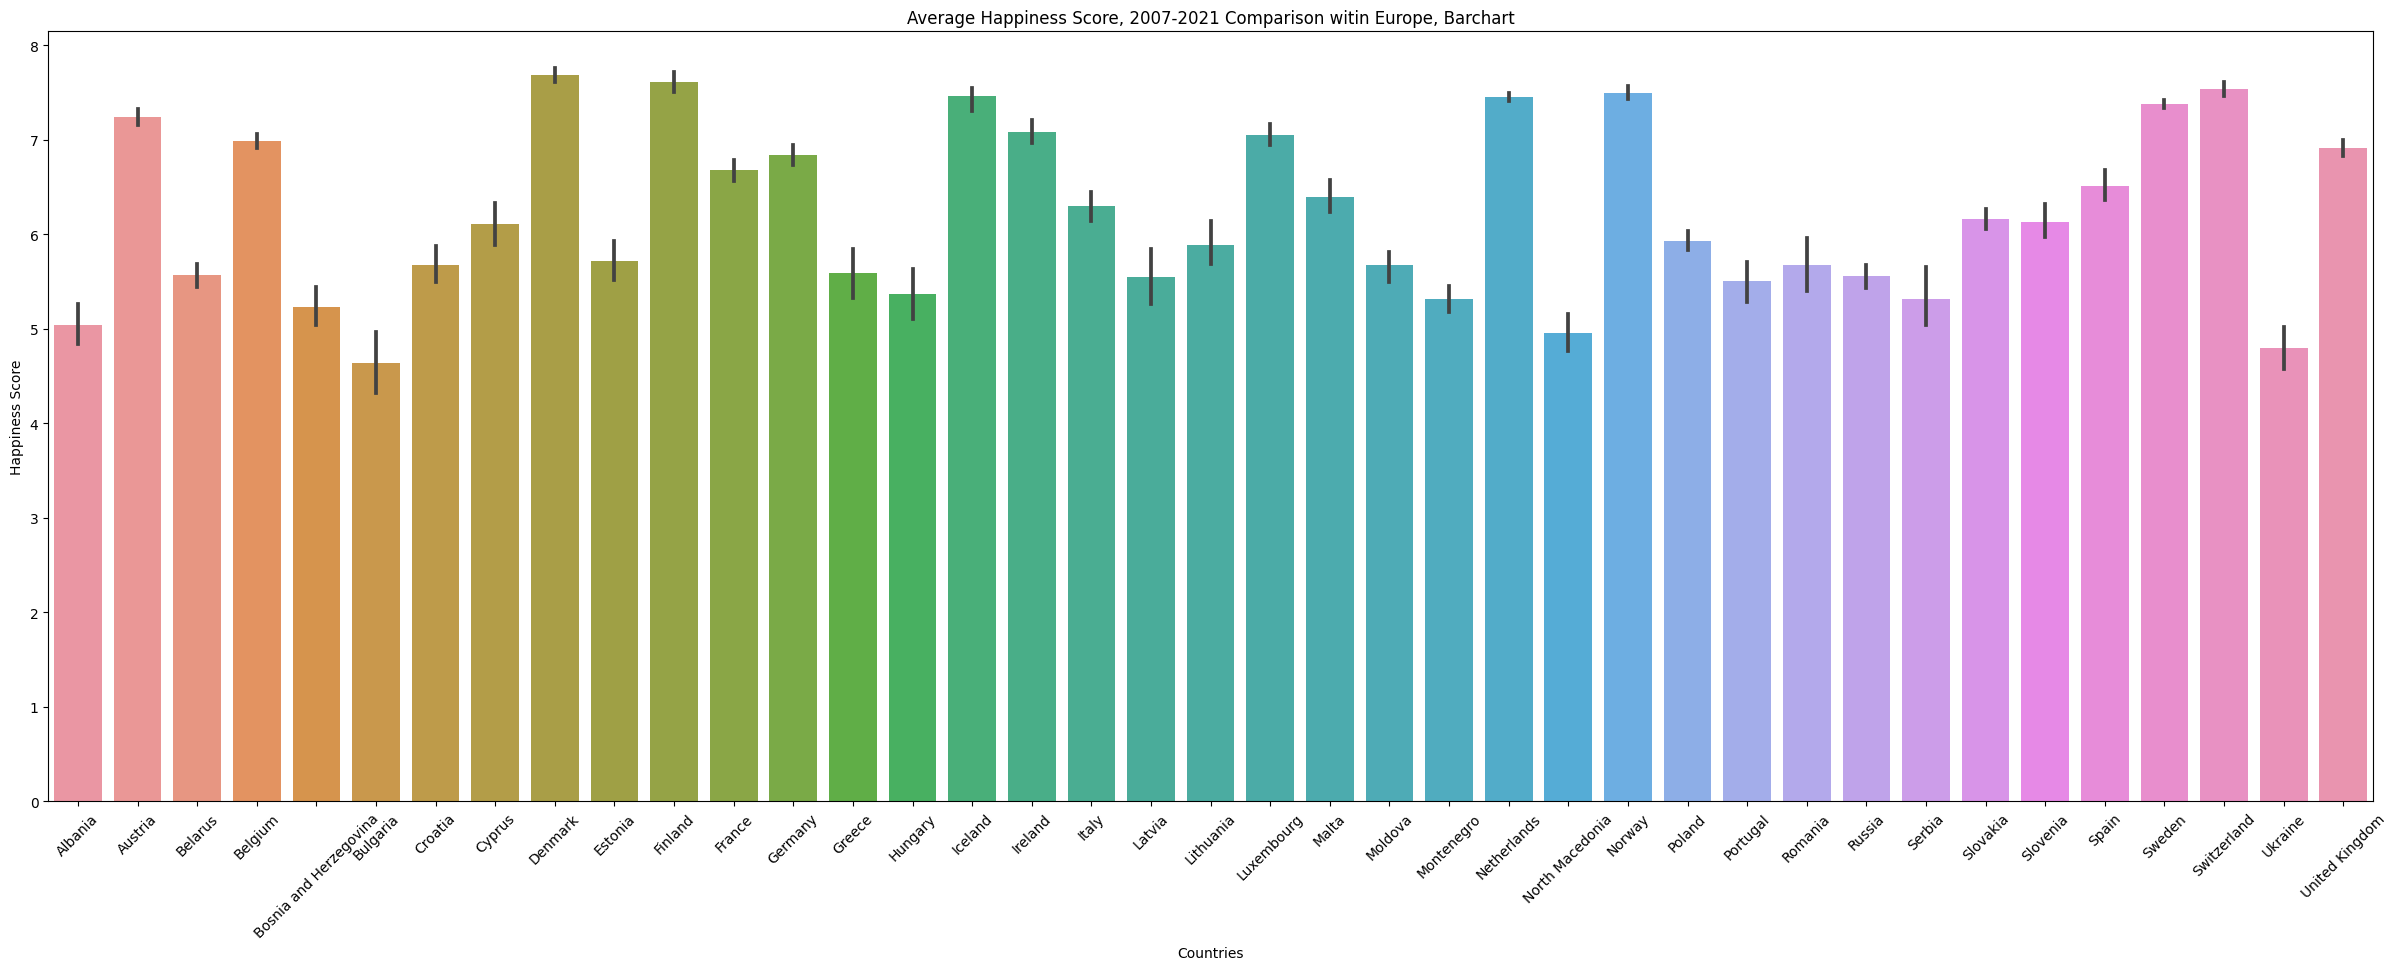

In [197]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.barplot(x=df_EUR['Country name'], y=df['Life_Ladder'])
ax.set(title='Average Happiness Score, 2007-2021 Comparison witin Europe, Barchart', ylabel='Happiness Score', xlabel='Countries');
plt.xticks(rotation=45);
plt.show()

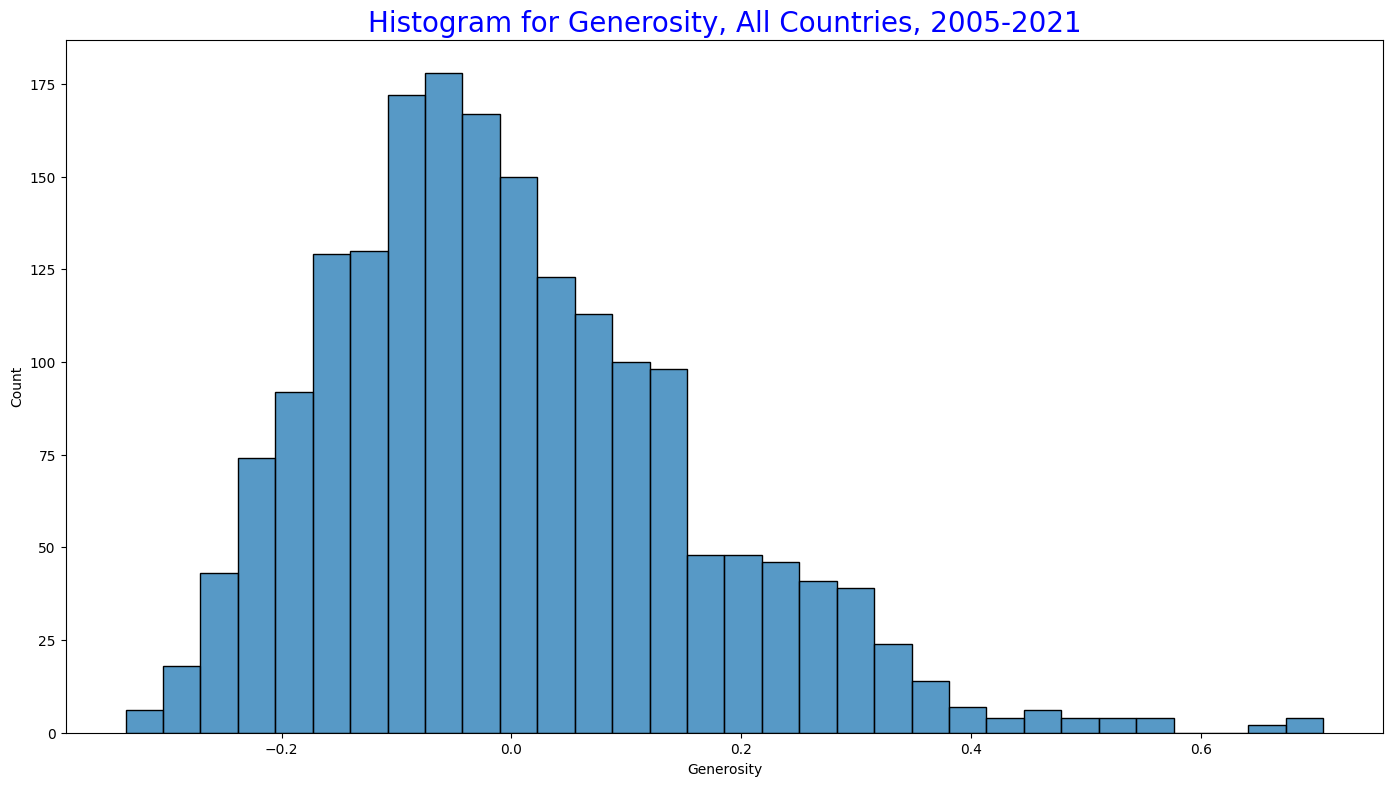

In [225]:
fig = plt.subplots(figsize=(17,9))
sns.histplot(data=df, x="Generosity")

plt.title("Histogram for Generosity, All Countries, 2005-2021", color='b', fontsize=20, ha='center')
plt.show()

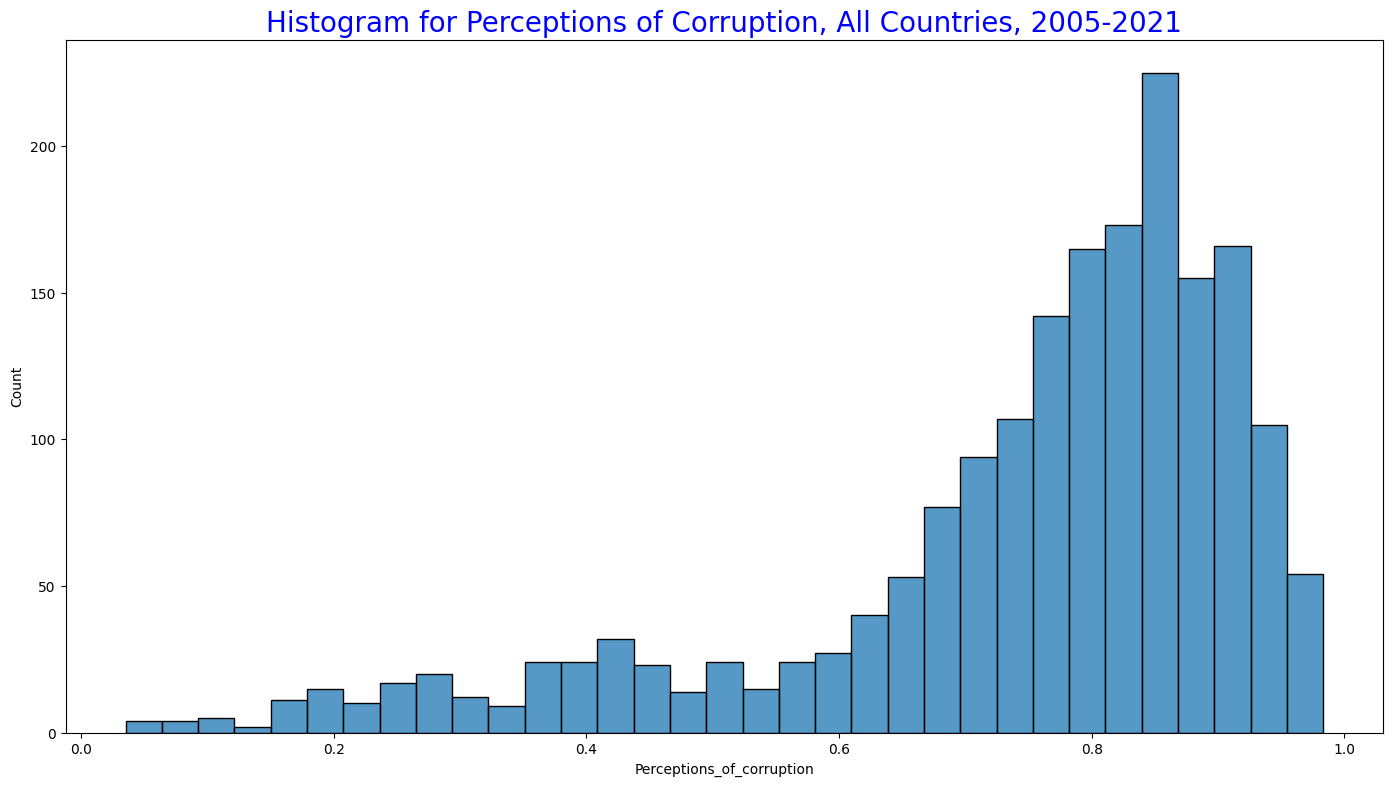

In [229]:
fig = plt.subplots(figsize=(17,9))
sns.histplot(data=df, x="Perceptions_of_corruption")

plt.title("Histogram for Perceptions of Corruption, All Countries, 2005-2021", color='b', fontsize=20, ha='center')
plt.show()

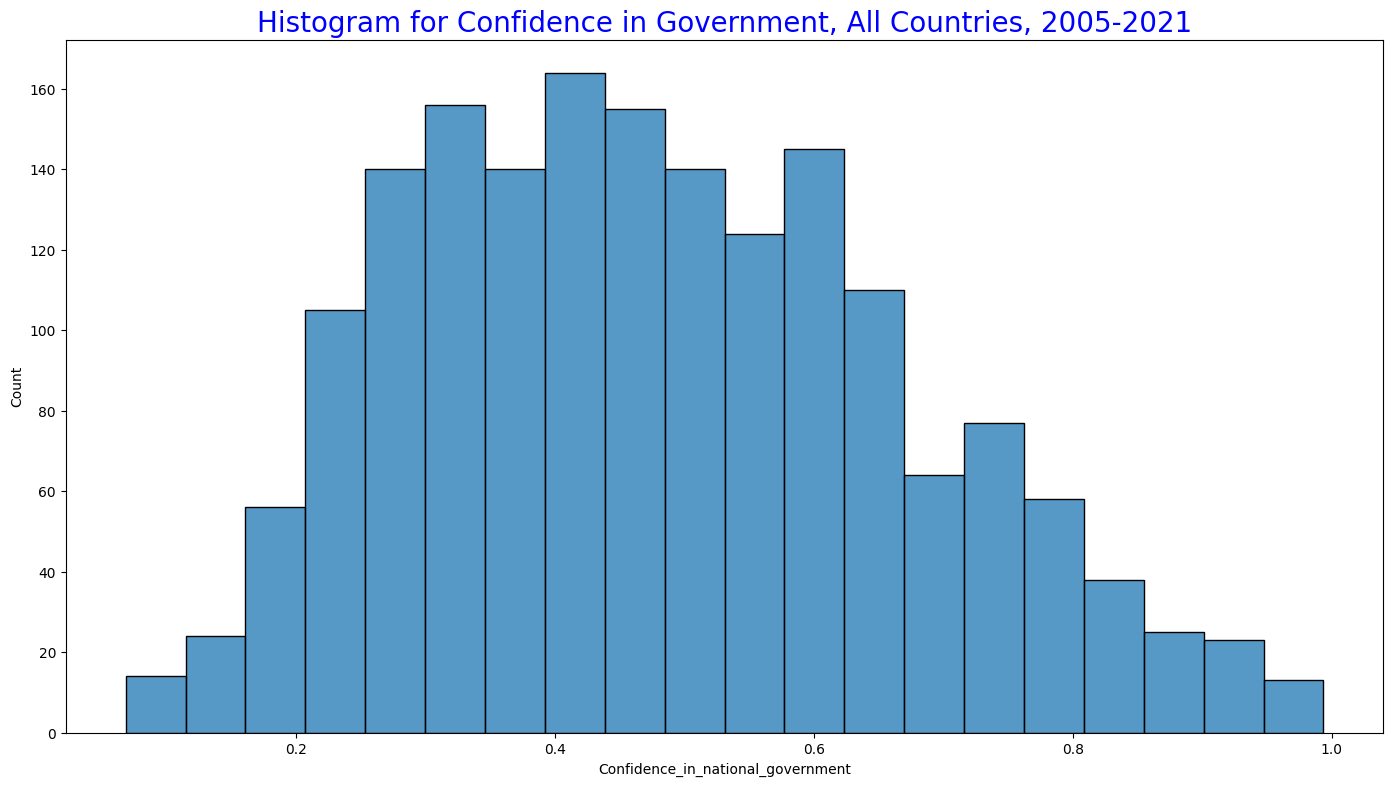

In [228]:
fig = plt.subplots(figsize=(17,9))
sns.histplot(data=df, x="Confidence_in_national_government")

plt.title("Histogram for Confidence in Government, All Countries, 2005-2021", color='b', fontsize=20, ha='center')
plt.show()

In [73]:
df['Country name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan',
       'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyz